# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
combined_mouse_study_df = pd.merge(study_results, mouse_metadata, how='left', on='Mouse ID')

# Display the data table for preview
combined_mouse_study_df.head()


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [2]:
# Checking the number of mice.
combined_mouse_study_df['Mouse ID'].nunique()

249

In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 'Mouse ID', 
duplicate_mice = combined_mouse_study_df[combined_mouse_study_df.duplicated(['Mouse ID','Timepoint'])]
duplicate_mice['Mouse ID']

137     g989
360     g989
681     g989
869     g989
1111    g989
Name: Mouse ID, dtype: object

In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
combined_mouse_study_df.loc[(combined_mouse_study_df["Mouse ID"] == "g989"), :]

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [30]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
cleaned_combined_mouse_study_df = combined_mouse_study_df.drop(combined_mouse_study_df[combined_mouse_study_df
                                  ["Mouse ID"] == "g989"].index)

cleaned_combined_mouse_study_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [6]:
# Checking the number of mice in the clean DataFrame.
cleaned_combined_mouse_study_df['Mouse ID'].nunique()

248

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume.

tumor_volume_mean = cleaned_combined_mouse_study_df.groupby('Drug Regimen').mean()['Tumor Volume (mm3)']
tumor_volume_median = cleaned_combined_mouse_study_df.groupby('Drug Regimen').median()['Tumor Volume (mm3)']
tumor_volume_var = cleaned_combined_mouse_study_df.groupby('Drug Regimen').var()['Tumor Volume (mm3)']
tumor_volume_std = cleaned_combined_mouse_study_df.groupby('Drug Regimen').std()['Tumor Volume (mm3)']
tumor_volume_sem = cleaned_combined_mouse_study_df.groupby('Drug Regimen').sem()['Tumor Volume (mm3)']

# Assemble the resulting series into a single summary DataFrame.
summary_tumor_table = pd.DataFrame({"Mean Tumor Volume": tumor_volume_mean, "Median Tumor Volume": tumor_volume_median,
                                   "Tumor Volume Variance": tumor_volume_var, "Tumor Volume Std. Dev.": tumor_volume_std,
                                   "Tumor Volume Std. Err.": tumor_volume_sem})

summary_tumor_table

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [21]:
# Using the aggregation method, produce the same summary statistics in a single line.

summary_tumor_table_agg = cleaned_combined_mouse_study_df.groupby('Drug Regimen')\
                          .agg({'Tumor Volume (mm3)': ['mean', 'median', 'var', 'std', 'sem']})
summary_tumor_table_agg

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

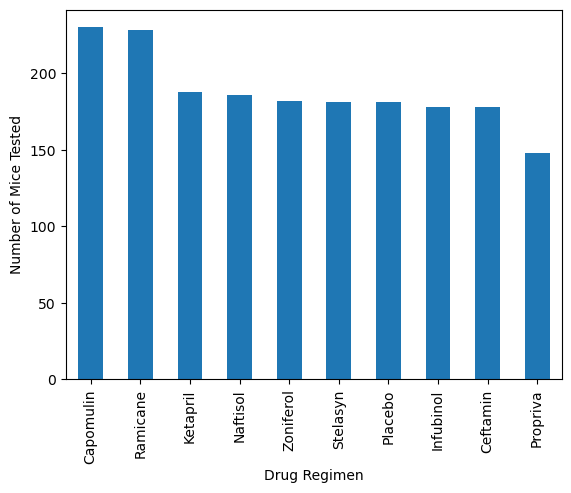

In [9]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.

mice_counts = cleaned_combined_mouse_study_df['Drug Regimen'].value_counts()
mice_counts.plot(kind="bar")
plt.xlabel("Drug Regimen")
plt.xticks(rotation=90)
plt.ylabel("Number of Mice Tested")
plt.show()

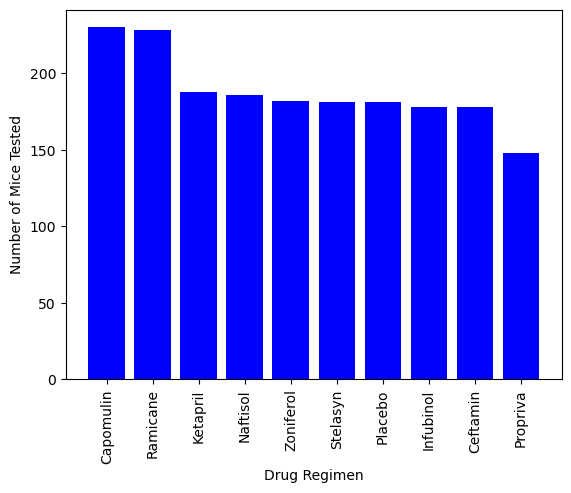

<Figure size 640x480 with 0 Axes>

In [10]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.

plt.bar(mice_counts.index, mice_counts.values, color='b')
plt.xlabel("Drug Regimen")
plt.xticks(rotation=90)
plt.ylabel("Number of Mice Tested")
plt.show()
plt.tight_layout()

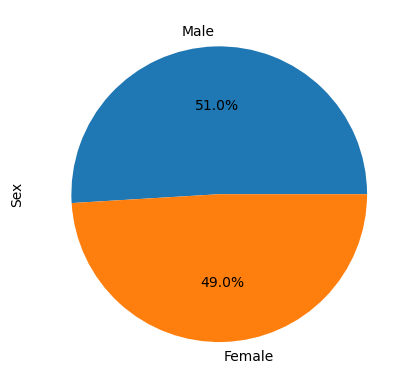

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas

counts = cleaned_combined_mouse_study_df.Sex.value_counts()
counts.plot(kind="pie",autopct='%1.1f%%')
plt.show()

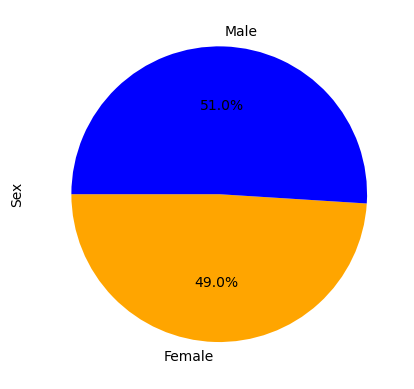

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

labels = ["Female","Male" ]
plt.ylabel("Sex")
sizes = [49, 51]
colors = ["orange", "blue"]
plt.pie(sizes, labels=labels, colors=colors,
        autopct="%1.1f%%", startangle=180)
plt.show()

## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin 

# Start by getting the last (greatest) timepoint for each mouse
final_tumor_volume = cleaned_combined_mouse_study_df.groupby(['Mouse ID'])['Timepoint'].max()
final_tumor_volume = final_tumor_volume.reset_index()

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
tumor_vol_last_timepoint = final_tumor_volume.merge(cleaned_combined_mouse_study_df,on=['Mouse ID','Timepoint'],how="left")
tumor_vol_last_timepoint

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
2,a262,45,70.717621,4,Placebo,Female,17,29
3,a275,45,62.999356,3,Ceftamin,Female,20,28
4,a366,30,63.440686,1,Stelasyn,Female,16,29
...,...,...,...,...,...,...,...,...
243,z435,10,48.710661,0,Propriva,Female,12,26
244,z578,45,30.638696,0,Ramicane,Male,11,16
245,z581,45,62.754451,3,Infubinol,Female,24,25
246,z795,45,65.741070,3,Naftisol,Female,13,29


In [14]:
# Put treatments into a list for a for loop (and later for plot labels)   
drug_treatments = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']
# Create empty list to fill with tumor vol data (for plotting)
tumor_volume_data=[] 

for drug_treatment in drug_treatments:
    volume_subset = tumor_vol_last_timepoint.loc[tumor_vol_last_timepoint["Drug Regimen"] == drug_treatment, 'Tumor Volume (mm3)']
    # add subset 
    tumor_volume_data.append(volume_subset)

    quartiles = volume_subset.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq 
    print(f"The IQR is: {iqr}")
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    print(f"Values below {lower_bound} could be outliers.")
    print(f"Values above {upper_bound} could be outliers.")


The IQR is: 7.781863460000004
Values below 20.70456164999999 could be outliers.
Values above 51.83201549 could be outliers.
The IQR is: 9.098536719999998
Values below 17.912664470000003 could be outliers.
Values above 54.30681135 could be outliers.
The IQR is: 11.477135160000003
Values below 36.83290494999999 could be outliers.
Values above 82.74144559000001 could be outliers.
The IQR is: 15.577752179999997
Values below 25.355449580000002 could be outliers.
Values above 87.66645829999999 could be outliers.


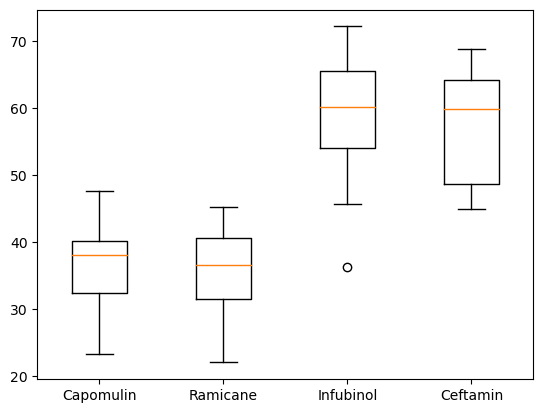

In [16]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
plt.boxplot(tumor_volume_data, labels = drug_treatments)
plt.show()

## Line and Scatter Plots

<AxesSubplot:title={'center':'Mouse Treated with Capomulin'}, xlabel='Timepoint'>

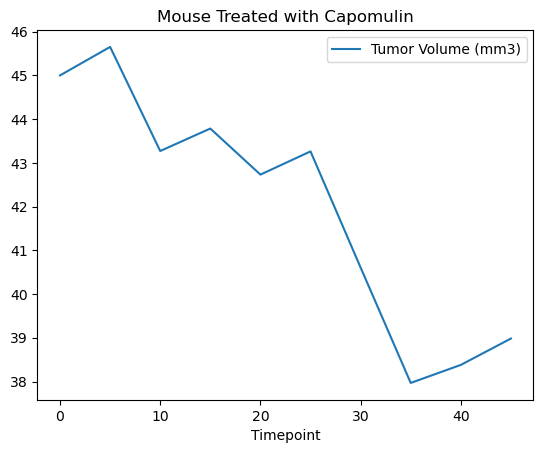

In [17]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin Mouse ID = b128 yaxis= tumor volume, xaxis=time point
a_mouse = cleaned_combined_mouse_study_df.loc[(cleaned_combined_mouse_study_df['Mouse ID'] == 'b128')&(cleaned_combined_mouse_study_df['Drug Regimen'] == 'Capomulin'),['Timepoint','Tumor Volume (mm3)']]

#plt.plot(a_mouse['Timepoint'], a_mouse['Tumor Volume (mm3)'])
a_mouse.plot(kind='line', x='Timepoint', title='Mouse Treated with Capomulin')


<AxesSubplot:title={'center':'Capomulin Tumor Volume vs Mouse Weight'}, xlabel='Tumor Volume (mm3)', ylabel='Weight (g)'>

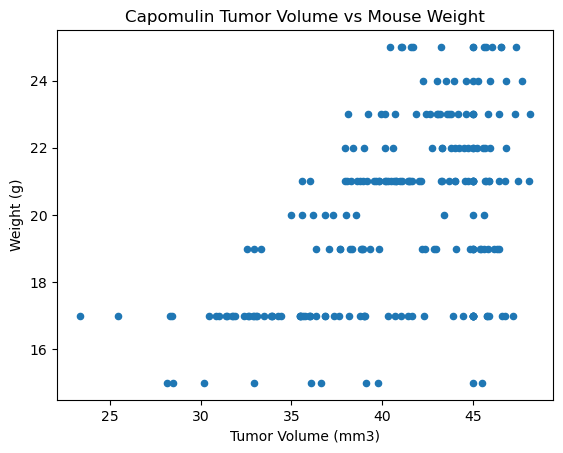

In [22]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen 1. filter for Capomulin, 2.
capomulin_tumor_vs_weight = cleaned_combined_mouse_study_df.loc[(cleaned_combined_mouse_study_df['Drug Regimen'] == 'Capomulin'),\
                            ['Weight (g)','Tumor Volume (mm3)']]
capomulin_tumor_vs_weight.plot(kind='scatter', x='Tumor Volume (mm3)', y='Weight (g)',\
                               title='Capomulin Tumor Volume vs Mouse Weight')

## Correlation and Regression

The correlation between tumor volume and mouse weight is 0.59


<function matplotlib.pyplot.show(close=None, block=None)>

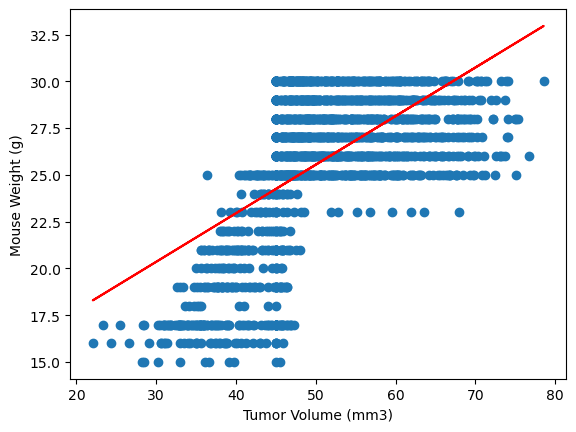

In [19]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

volume = cleaned_combined_mouse_study_df['Tumor Volume (mm3)']
weight = cleaned_combined_mouse_study_df['Weight (g)']

(slope, intercept, rvalue, pvalue, stderr) = linregress(volume, weight)
regress_values = volume * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
correlation = st.pearsonr(volume,weight)

plt.scatter(volume,weight)
plt.plot(volume,regress_values,"r-")
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")
plt.xlabel('Tumor Volume (mm3)')
plt.ylabel('Mouse Weight (g)')
print(f"The correlation between tumor volume and mouse weight is {round(correlation[0],2)}")
plt.show